# Experiment 7

This experiment investigates the convergence rates when $p = O(n^2)$, using saturated features.

With this rate, we expect a gap between in-sample and out-sample performance of $O(1/\lambda)$.

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import numpy as np
import cvxpy as cvx
from model.distrs import StudentTDistribution,DiscreteDistribution,NormalDistribution
from model.distrs import E,Var,Std
import model.synth_data as synth
import model.utility as ut
import model.problem as pr

from helper.stats import five_stats

In [4]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (6,4)
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['savefig.dpi'] = 100
plt.rc('text',usetex=True)
plt.rc('font',serif='times')

In [15]:
ps = np.arange(4,61)
p_true = max(ps)
ns = np.floor(20*np.sqrt(ps))
n_true = 50000
n_experiments = 150
λ = 3
δ = 0.2

#Utility
β = 1
r_threshold = 60
u = ut.LinearPlateauUtility(β,r_threshold)

Rf = 0 

In [18]:
np.array([ps,ns]).T

array([[   4.,   40.],
       [   5.,   44.],
       [   6.,   48.],
       [   7.,   52.],
       [   8.,   56.],
       [   9.,   60.],
       [  10.,   63.],
       [  11.,   66.],
       [  12.,   69.],
       [  13.,   72.],
       [  14.,   74.],
       [  15.,   77.],
       [  16.,   80.],
       [  17.,   82.],
       [  18.,   84.],
       [  19.,   87.],
       [  20.,   89.],
       [  21.,   91.],
       [  22.,   93.],
       [  23.,   95.],
       [  24.,   97.],
       [  25.,  100.],
       [  26.,  101.],
       [  27.,  103.],
       [  28.,  105.],
       [  29.,  107.],
       [  30.,  109.],
       [  31.,  111.],
       [  32.,  113.],
       [  33.,  114.],
       [  34.,  116.],
       [  35.,  118.],
       [  36.,  120.],
       [  37.,  121.],
       [  38.,  123.],
       [  39.,  124.],
       [  40.,  126.],
       [  41.,  128.],
       [  42.,  129.],
       [  43.,  131.],
       [  44.,  132.],
       [  45.,  134.],
       [  46.,  135.],
       [  4

In [19]:
# True market
R_true = NormalDistribution(8,10)
X_true = [1/np.sqrt(2)*StudentTDistribution(ν=4) for _ in range(p_true)]
M_true = synth.GaussianMarket(X_true,R_true)

# Discretized market
X,R = M_true.sample(n_true)
M = synth.MarketDiscreteDistribution(X,R)

In [20]:
# Real q∗ value computation
p_star = pr.Problem(X,R,λ=0,u=u)
p_star.solve()
q_star = p_star.q

In [21]:
R_star_q_star = p_star.insample_cost(q_star)
CE_star_q_star = p_star.insample_CE(q_star)

In [22]:
# Results placeholder
qs = np.zeros(shape=(len(ns),p_true+1,n_experiments))
CEs_ins = np.empty(shape=(len(ns),n_experiments))
CEs_oos = np.empty(shape=(len(ns),n_experiments))

In [23]:
# About 8minutes running time.
for i,(n,p) in enumerate(zip(ns,ps)):
    print('Sampling %d problems of size %d × %d' % (n_experiments,n,p+1))
    prs = pr.ProblemsDistribution(M,n,λ,u,Rf,problem_t=pr.SaturatedFeaturesMaskedProblem)
    prs.sample(n_experiments,{'fs':range(p+1)},par=True)
    qs[i,:p+1,:] = prs.qs.T
    CEs_ins[i,:] = prs.CEs_ins
    CEs_oos[i,:] = prs.CEs_oos

Sampling 150 problems of size 154 × 61
Sampling 150 problems of size 153 × 60
Sampling 150 problems of size 152 × 59
Sampling 150 problems of size 150 × 58
Sampling 150 problems of size 149 × 57
Sampling 150 problems of size 148 × 56
Sampling 150 problems of size 146 × 55
Sampling 150 problems of size 145 × 54
Sampling 150 problems of size 144 × 53
Sampling 150 problems of size 142 × 52
Sampling 150 problems of size 141 × 51
Sampling 150 problems of size 140 × 50
Sampling 150 problems of size 138 × 49
Sampling 150 problems of size 137 × 48
Sampling 150 problems of size 135 × 47
Sampling 150 problems of size 134 × 46
Sampling 150 problems of size 132 × 45
Sampling 150 problems of size 131 × 44
Sampling 150 problems of size 129 × 43
Sampling 150 problems of size 128 × 42
Sampling 150 problems of size 126 × 41
Sampling 150 problems of size 124 × 40
Sampling 150 problems of size 123 × 39
Sampling 150 problems of size 121 × 38
Sampling 150 problems of size 120 × 37
Sampling 150 problems of 

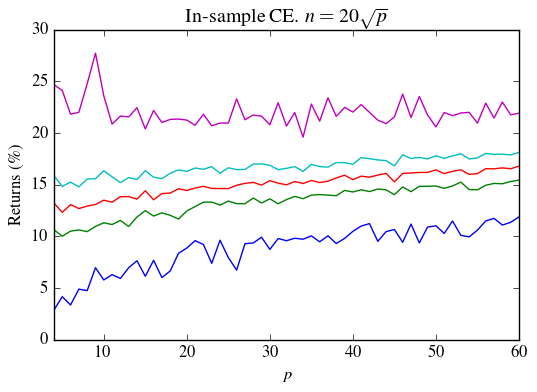

In [25]:
plt.plot(*five_stats(CEs_ins,ps))
plt.xlabel('$p$')
plt.ylabel('Returns (\%)')
plt.axis(xmin=4)
plt.title('In-sample CE. $n = 20\sqrt{p}$');

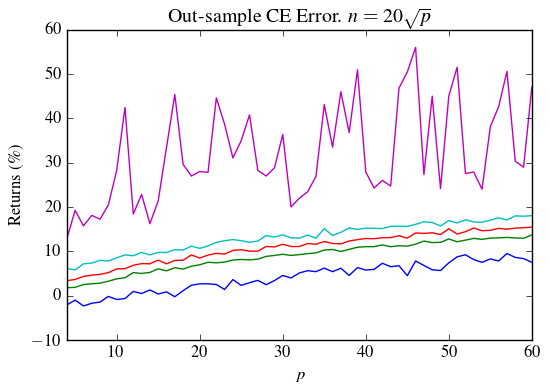

In [26]:
plt.plot(*five_stats(CEs_ins-CEs_oos,ps))
plt.xlabel('$p$')
plt.ylabel('Returns (\%)')
plt.axis(xmin=4)
plt.title('Out-sample CE Error. $n = 20\sqrt{p}$');

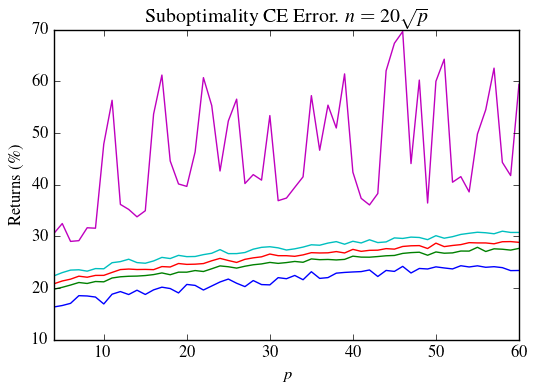

In [27]:
plt.plot(*five_stats(CE_star_q_star - CEs_oos,ps))
plt.xlabel('$p$')
plt.ylabel('Returns (\%)');
plt.axis(xmin=4)
plt.title('Suboptimality CE Error. $n = 20\sqrt{p}$');